In [7]:
from landsat.search import Search

In [8]:
search = Search()

In [9]:
results = search.search(lat=38.9004204, lon=-77.0237117)['results']

In [10]:
results

[{'cloud': 1.8,
  'date': u'2015-09-18',
  'path': u'015',
  'row': u'033',
  'sat_type': u'L8',
  'sceneID': u'LC80150332015261LGN00',
  'thumbnail': u'http://earthexplorer.usgs.gov/browse/landsat_8/2015/015/033/LC80150332015261LGN00.jpg'}]

In [11]:
from IPython.display import Image
from IPython.display import display


In [13]:
display(Image(url=results[0]['thumbnail']))

In [3]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()


In [4]:
location = geolocator.geocode("singapore")

In [5]:
location

Location((1.2904527, 103.852038, 0.0))

In [14]:
results = search.search(lat=location.latitude, lon=location.longitude)['results'][0]

In [15]:
display(Image(url=results['thumbnail']))

In [16]:
from skimage import io


In [17]:
image = io.imread(results['thumbnail'])


In [18]:
image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ..., 
       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)


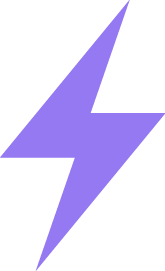

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [21]:
from lightning import Lightning
lgn = Lightning(host='http://public.lightning-viz.org', ipython=True)

In [22]:
lgn.image(image)

/Library/Python/2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [23]:
lgn.set_size('full')
viz = lgn.image(image)
viz.open()
lgn.set_size('medium')

In [27]:
from skimage.filter import hsobel,vsobel
from skimage.color import rgb2gray


In [28]:
gray_image = rgb2gray(image)



In [29]:
h_gradient = hsobel(gray_image)
v_gradient = vsobel(gray_image)



/Library/Python/2.7/site-packages/skimage/filters/edges.py:173: skimage_deprecation: Call to deprecated function ``hsobel``. Use ``skimage.filters.sobel_h`` instead.
  def hsobel(image, mask=None):
/Library/Python/2.7/site-packages/skimage/filters/edges.py:204: skimage_deprecation: Call to deprecated function ``vsobel``. Use ``skimage.filters.sobel_v`` instead.
  def vsobel(image, mask=None):


In [30]:
lgn.image(h_gradient)

In [31]:
lgn.image(v_gradient)

# exercise 1

## only plot pixels above a certain intensity threshold.
## otherwise set the pixels to white

# exercise 2 

## only plot pixels that are green-ish in color

In [35]:
import colormath

### helpful functions

In [41]:
from colormath.color_objects import LabColor, sRGBColor
from colormath.color_conversions import convert_color

rgb = sRGBColor(0.0, 0.9, 0.2)
lab = convert_color(rgb, LabColor)


In [42]:
from colormath.color_objects import LabColor
from colormath.color_diff import delta_e_cie1976

# Reference color.
color1 = LabColor(lab_l=0.9, lab_a=16.3, lab_b=-2.22)
# Color to be compared to the reference.
color2 = LabColor(lab_l=0.7, lab_a=14.2, lab_b=-1.80)
# This is your delta E value as a float.
delta_e = delta_e_cie1976(color1, color2)


In [37]:
delta_e

2.1509067855209363